# Kolektor Surface Defect Detection
TMM4128 - Machine Learning for Engineers - Semestral Project


### Import TensorFlow

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
# import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import math

In [2]:
import tensorflow as tf
# CUDA check
print("Number of GPUs: ", len(tf.config.list_physical_devices('GPU')))

Number of GPUs:  1


In [3]:
Categories = ["Undamaged", "Damaged"]
data_train = "./datasets/KolektorSDD2/train/"
data_test = "./datasets/KolektorSDD2/test/"
current_directory = os.getcwd()
print(current_directory)

flat_train = []
flat_train_GT = []
flat_test = []
flat_test_GT = []
damage_label_train = []
damage_label_test = []
img_name = []
X_train = []
X_test = []
y_train = []
y_test = []

# Average image size
img_height = 636 
img_width = 229
img_size = (img_height, img_width)

c:\Users\lukasvi\Documents\GitHub\NTNU-ML-KolektorSDD2


In [4]:
# Create TRAIN DATA

#Create path to folder
path = data_train

list_damaged = []

#For-loop to go through all the contents in the folder
for img in os.listdir(path):
    #Distinguishing between Groundtruth pictures and Actual pictures
    if "GT" in img:
        img_array = cv2.imread(os.path.join(path,img))
        #If the GT Image is Black, no damage is detected
        if np.all(img_array == 0): # OK
            y_train.append(0)
        else:                   # NOK
            y_train.append(1) # Original image
            list_damaged.append(img)
        
        #Mark GT images, if any defect is on them
    elif "GT" not in img:
        img2 = load_img(os.path.join(path,img), target_size = img_size) # load image and resize
        img_array = img_to_array(img2) # convert image to array
        img_array /= 255.0 # normalizing to scale from 0 to 1
        X_train.append(img_array) # original image

for img_name in list_damaged:
    img_name = img_name[:5] + ".png"
    img = load_img(os.path.join(path,img_name), target_size = img_size) # load image and resize
    img_array = img_to_array(img2) # convert image to array
    img_array /= 255.0 # normalizing to scale from 0 to 1
    rotated_image_array = np.rot90(img_array, k=2)
    X_train.append(rotated_image_array) # rotated image
    y_train.append(1)


print(len(X_train), len(y_train))

2579 2579


In [5]:
# # Faulty pictures export

# import cv2
# stop_index = 5 # 5 or 8 for GT
# vis = cv2.imread(os.path.join(path,list_damaged[0][:stop_index] + ".png"))
# vis = cv2.resize(vis, (231,636), interpolation = cv2.INTER_LINEAR)

# for i in range(1, 8):
#     img = cv2.imread(os.path.join(path,list_damaged[i][:stop_index] + ".png"))
#     stretch_near = cv2.resize(img, (231,636), interpolation = cv2.INTER_LINEAR)
#     vis = np.concatenate((vis, stretch_near), axis=1)

# vis1 = cv2.imread(os.path.join(path,list_damaged[8][:stop_index] + ".png"))
# vis1 = cv2.resize(vis1, (231,636), interpolation = cv2.INTER_LINEAR)

# for i in range(9, 16):
#     img = cv2.imread(os.path.join(path,list_damaged[i][:stop_index] + ".png"))
#     stretch_near = cv2.resize(img, (231,636), interpolation = cv2.INTER_LINEAR)
#     vis1 = np.concatenate((vis1, stretch_near), axis=1)
# # cv2.imshow('Horizontal', vis)

# visAll = np.concatenate((vis, vis1), axis=0)

# cv2.imwrite('out.png', visAll)

In [6]:
# Create TEST DATA 

#Create path to folder
path = data_test

#For-loop to go through all the contents in the folder
for img in os.listdir(path):
    #Distinguishing between Groundtruth pictures and Actual pictures
    
    if "GT" in img:
        img_array = cv2.imread(os.path.join(path,img))
        flat_test_GT.append(img_array.flatten())
        #If the GT Image is Black, no damage is detected
        if np.all(img_array == 0):
            y_test.append(0)
        else:
            y_test.append(1)
        #Mark GT images, if any defect is on them
    elif "GT" not in img:
        img2 = load_img(os.path.join(path,img), target_size = img_size) # load image and resize
        img_array = img_to_array(img2) # convert image to array
        img_array /= 255.0 # normalizing to scale from 0 to 1
        X_test.append(img_array)

In [7]:
X_train = np.array(X_train) 
X_test = np.array(X_test) 
y_train = np.array(y_train) 
y_test = np.array(y_test) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2579, 636, 229, 3)
(2579,)
(1004, 636, 229, 3)
(1004,)


In [8]:
# Faulty vs non-faulty images
unique, counts = np.unique(y_train, return_counts=True)
pos = counts[1]
neg = counts[0]
print(dict(zip(unique, counts)))
print("Percentage of faulty images in all train data:", counts[1]/len(y_train)*100, " %")

{0: 2085, 1: 494}
Percentage of faulty images in all train data: 19.15471112834432  %


In [9]:
# Train - Test split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 4)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)


x_train shape (1805, 636, 229, 3)
x_val shape (774, 636, 229, 3)
y_train shape (1805,)
y_val shape (774,)


In [10]:
unique, counts = np.unique(y_train, return_counts=True)

print(dict(zip(unique, counts)))
print("Percentage of faulty images in train data:", counts[1]/len(y_train)*100, " %")

unique, counts = np.unique(y_val, return_counts=True)

print(dict(zip(unique, counts)))
print("Percentage of faulty images in test data:", counts[1]/len(y_val)*100, " %")

{0: 1447, 1: 358}
Percentage of faulty images in train data: 19.833795013850416  %
{0: 638, 1: 136}
Percentage of faulty images in test data: 17.571059431524546  %


In [11]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


initial_bias = np.log([pos/neg])
# print(initial_bias)

output_bias = tf.keras.initializers.Constant(initial_bias)


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (img_height,img_width,3)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (img_height,img_width,3)))
model.add(MaxPool2D(pool_size=(2,2)))

# fully connected
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid", bias_initializer=output_bias))




### Test of Autoencoder for de-noising

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.models import Model

# Autoencoder

input = layers.Input(shape=(img_height, img_width, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

x = layers.Flatten()(x)
x = layers.Dense(1, activation="sigmoid")(x) # binary activation output
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
autoencoder.summary()

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 636, 229, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 636, 229, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 318, 115, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 318, 115, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 159, 58, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 318, 116, 32)     9248

In [23]:
autoencoder.fit(
    x=X_train,
    y=y_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping]
)

Epoch 1/50
15/15 [==============================] - 12s 755ms/step - loss: 9.4195 - accuracy: 0.6687 - val_loss: 2.2099 - val_accuracy: 0.8243
Epoch 2/50
15/15 [==============================] - 10s 699ms/step - loss: 1.5226 - accuracy: 0.7163 - val_loss: 0.6418 - val_accuracy: 0.8243
Epoch 3/50
15/15 [==============================] - 10s 701ms/step - loss: 0.6759 - accuracy: 0.8017 - val_loss: 0.6806 - val_accuracy: 0.8243
Epoch 4/50
15/15 [==============================] - 11s 703ms/step - loss: 0.6798 - accuracy: 0.8017 - val_loss: 0.6737 - val_accuracy: 0.8243
Epoch 5/50
15/15 [==============================] - 11s 703ms/step - loss: 0.6700 - accuracy: 0.8017 - val_loss: 0.6555 - val_accuracy: 0.8243
Epoch 6/50
15/15 [==============================] - 11s 705ms/step - loss: 0.6382 - accuracy: 0.8017 - val_loss: 0.5771 - val_accuracy: 0.8243
Epoch 7/50
15/15 [==============================] - 11s 706ms/step - loss: 0.5287 - accuracy: 0.8017 - val_loss: 0.4521 - val_accuracy: 0.8243

In [24]:
print("Accuracy of the model is --> " , autoencoder.evaluate(X_val, y_val, batch_size=128)[1]*100 , "%")
print("Loss of the model is --> " , autoencoder.evaluate(X_val, y_val, batch_size=128)[0])

7/7 [==============================] - 2s 162ms/step - loss: 0.2666 - accuracy: 0.9302
Accuracy of the model is -->  93.0232584476471 %
7/7 [==============================] - 1s 160ms/step - loss: 0.2666 - accuracy: 0.9302
Loss of the model is -->  0.2665816843509674


### End of Autoencoder

In [12]:
# Define the optimizer
# In neural networks, an optimizer is an algorithm used to adjust the weights and biases 
# of the network during training in order to minimize the loss function and improve the accuracy of the model.

optimizer = Adam(learning_rate=0.001) # , beta_1=0.9, beta_2=0.999

In [13]:
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])
model.summary()

In [14]:
epochs = 100  
batch_size = 250

In [15]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)

In [16]:
# Lets fit the model

history = model.fit(X_train, 
                    y_train, 
                    epochs = epochs, 
                    validation_data = (X_val, y_val), 
                    steps_per_epoch=X_train.shape[0] // batch_size, 
                    callbacks=[early_stopping]) 

Epoch 1/100
7/7 [==============================] - 24s 2s/step - loss: 2.7051 - accuracy: 0.7163 - val_loss: 0.4655 - val_accuracy: 0.8243
Epoch 2/100
7/7 [==============================] - 5s 769ms/step - loss: 0.5007 - accuracy: 0.8017 - val_loss: 0.4657 - val_accuracy: 0.8243
Epoch 3/100
7/7 [==============================] - 5s 766ms/step - loss: 0.4980 - accuracy: 0.8017 - val_loss: 0.4658 - val_accuracy: 0.8243
Epoch 4/100
7/7 [==============================] - 5s 769ms/step - loss: 0.4979 - accuracy: 0.8017 - val_loss: 0.4657 - val_accuracy: 0.8243
Epoch 5/100
7/7 [==============================] - 5s 780ms/step - loss: 0.4973 - accuracy: 0.8017 - val_loss: 0.4644 - val_accuracy: 0.8243
Epoch 6/100
7/7 [==============================] - 5s 779ms/step - loss: 0.4939 - accuracy: 0.8017 - val_loss: 0.4521 - val_accuracy: 0.8243
Epoch 7/100
7/7 [==============================] - 5s 767ms/step - loss: 0.4888 - accuracy: 0.8017 - val_loss: 0.4486 - val_accuracy: 0.8243
Epoch 8/100
7/7

In [17]:
print("Accuracy of the model is --> " , model.evaluate(X_val, y_val, batch_size=batch_size)[1]*100 , "%")
print("Loss of the model is --> " , model.evaluate(X_val, y_val, batch_size=batch_size)[0])

4/4 [==============================] - 2s 222ms/step - loss: 0.2450 - accuracy: 0.9406
Accuracy of the model is -->  94.05684471130371 %
4/4 [==============================] - 1s 140ms/step - loss: 0.2450 - accuracy: 0.9406
Loss of the model is -->  0.24496020376682281


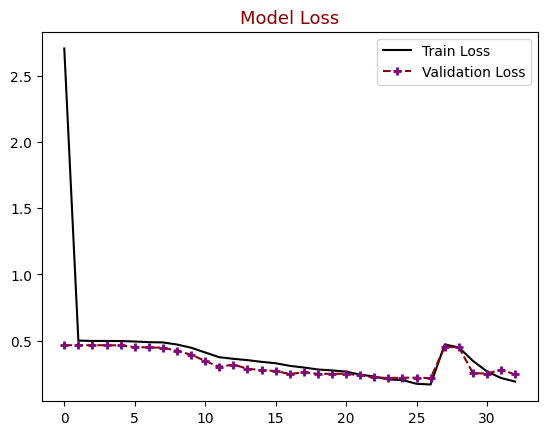

In [18]:
# Model Loss

plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

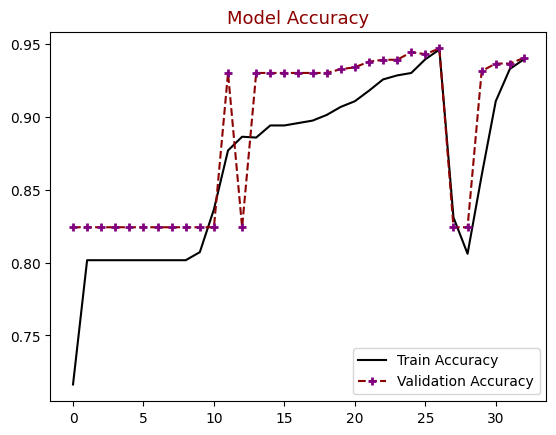

In [19]:
# Model Accuracy 

plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", marker = "+", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [21]:
Y_predict_test = model.predict(X_test)
print(Y_predict_test)

binary_predictions = (Y_predict_test > 0.5).astype(int)

accuracy = (binary_predictions.flatten() == y_test).mean()
unique, counts = np.unique(y_test, return_counts=True)

print(dict(zip(unique, counts)))
print(894/len(y_test))

print(f"Test accuracy: {accuracy * 100:.2f}%")

32/32 [==============================] - 1s 30ms/step
[[0.10447237]
 [0.09657013]
 [0.08817079]
 ...
 [0.07354869]
 [0.06230111]
 [0.05910594]]
{0: 894, 1: 110}
0.8904382470119522
Test accuracy: 90.74%


Test accuracy: 89.34 %

Test accuracy: 92.13 % (I don't know what changed, only the image size... 636x229)

90.74 % with initial bias

25/25 [==============================] - 1s 29ms/step


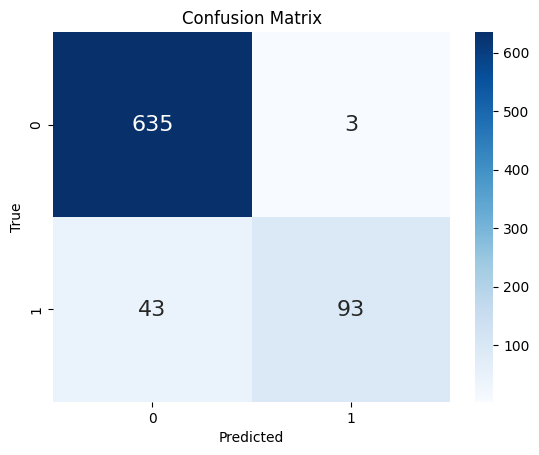

Accuracy: 94.06%
Precision: 0.9688
Recall: 0.6838
F1 Score: 0.8017


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have 'test_labels' and 'binary_predictions'
# test_labels: True labels for the test set
# binary_predictions: Predictions made by the model (0 or 1)

Y_pred = model.predict(X_val)
Y_pred_bin_list = []
for val in Y_pred:
    if val > 0.5:
        Y_pred_bin_list.append(1)
    else:
        Y_pred_bin_list.append(0)
Y_pred_bin = np.array(Y_pred_bin_list)
#print(Y_pred_bin)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, Y_pred_bin)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Additional metrics
accuracy = accuracy_score(y_val, Y_pred_bin)
precision = precision_score(y_val, Y_pred_bin)
recall = recall_score(y_val, Y_pred_bin)
f1 = f1_score(y_val, Y_pred_bin)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

32/32 [==============================] - 2s 51ms/step


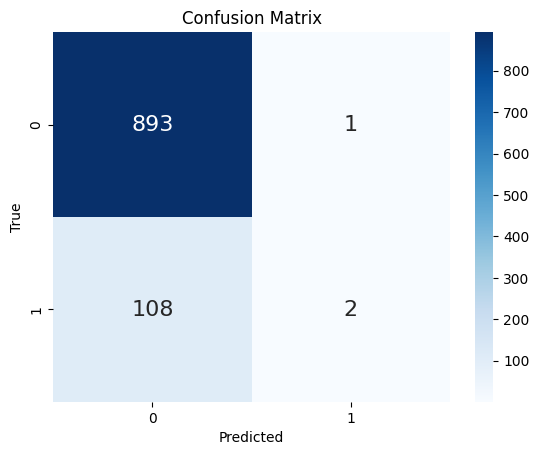

Accuracy: 89.14%
Precision: 0.6667
Recall: 0.0182
F1 Score: 0.0354


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have 'test_labels' and 'binary_predictions'
# test_labels: True labels for the test set
# binary_predictions: Predictions made by the model (0 or 1)

Y_pred = model.predict(X_test)
Y_pred_bin_list = []
for val in Y_pred:
    if val > 0.5:
        Y_pred_bin_list.append(1)
    else:
        Y_pred_bin_list.append(0)
Y_pred_bin = np.array(Y_pred_bin_list)
# print(Y_pred_bin)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred_bin)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, Y_pred_bin)
precision = precision_score(y_test, Y_pred_bin)
recall = recall_score(y_test, Y_pred_bin)
f1 = f1_score(y_test, Y_pred_bin)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")